In [3]:
# Import modules
import Functional_Data_functions
from Functional_Data_functions import Hyperparameter_Test_n_data,LSTM_class,conv_total_out, Smoothing_method,weights_init_normal,HyperParameters,Hyperparameter_Search,Hyperparameter_Test,Hyper_parameter_GridSearch,TSCNN,Compile_train,Compare_epochs, from_torch_to_Datagrid, conv_block_out_lp,Multiple_Window_Maker
from Functional_Data_functions import Compare_epochs,Compile_class,conv_total_out_no_pool,conv_total_out_without_pooling, conv_total_out_une_couche, Window_Maker, MultiBasis
import inspect
import scipy.stats
from scipy.stats import ttest_ind
import random
import torch
import torch.nn.init as init
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import os
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.nn.utils.rnn import pack_sequence
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib
from scipy.stats import norm
# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import skfda as fda
from skfda import representation as representation
from skfda.exploratory.visualization import FPCAPlot
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial
import scipy
from scipy.interpolate import BSpline
import os
import ignite
from tqdm import tqdm
import sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import random
from random import seed
from scipy import stats
import statistics
from statistics import stdev
import gc
import skfda
from skfda import FDataGrid as fd
from skfda.representation.basis import BSpline as B
from Functional_Data_functions import Compare_n_datas
# from skfda.representation.basis import VectorValued as MultiBasis
import copy

In [4]:
##Importation des 1ère données: Phonèmes
##Tâche: Classification en 5 classes 
Phoneme=skfda.datasets.fetch_cran("phoneme",package_name="fda.usc")
phoneme=Phoneme['phoneme']

x_train,x_test,y_train,y_test=phoneme['learn'],phoneme['test'],phoneme['classlearn'],phoneme['classtest']


x_train_tensor=torch.tensor(x_train.data_matrix).reshape(250,1,150).cuda().float()
x_test_tensor=torch.tensor(x_test.data_matrix).reshape(250,1,150).cuda().float()
y_train_tensor=torch.tensor(y_train.codes).unsqueeze(1).unsqueeze(2).long().cuda()
y_test_tensor=torch.tensor(y_test.codes).unsqueeze(1).unsqueeze(2).long().cuda()

X1=torch.cat([x_train_tensor,x_test_tensor])
Y1=torch.cat([y_train_tensor,y_test_tensor])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")


In [5]:
##Importation des 2nd données: El_nino
##Tâche: Classification en 4 classes 
ElNino_OISST_region_1and2=skfda.datasets.fetch_cran("ElNino_OISST_region_1and2","rainbow")
ElNino_OISST_region_3=skfda.datasets.fetch_cran("ElNino_OISST_region_3","rainbow")
ElNino_OISST_region_4=skfda.datasets.fetch_cran("ElNino_OISST_region_4","rainbow")
ElNino_OISST_region_3and4=skfda.datasets.fetch_cran("ElNino_OISST_region_3and4","rainbow")
ElNino_OISST_region_1and2_y=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['y'].to_numpy()
ElNino_OISST_region_1and2_x=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['x']
# plt.plot(ElNino_OISST_region_1and2_x,ElNino_OISST_region_1and2_y)
# plt.show(
# )
ElNino_OISST_region_3_y=ElNino_OISST_region_3['ElNino_OISST_region_3']['y'].to_numpy()
ElNino_OISST_region_3_x=ElNino_OISST_region_3['ElNino_OISST_region_3']['x']
# plt.plot(ElNino_OISST_region_3_x,ElNino_OISST_region_3_y)
# plt.show(

# )
ElNino_OISST_region_3and4_y=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['y'].to_numpy()
ElNino_OISST_region_3and4_x=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['x']
# plt.plot(ElNino_OISST_region_3and4_x,ElNino_OISST_region_3and4_y)
# plt.show(
# )


ElNino_OISST_region_4_y=ElNino_OISST_region_4['ElNino_OISST_region_4']['y'].to_numpy()
ElNino_OISST_region_4_x=ElNino_OISST_region_4['ElNino_OISST_region_4']['x']
# plt.plot(ElNino_OISST_region_4_x,ElNino_OISST_region_4_y)
# plt.show(
# )
grid_points=ElNino_OISST_region_1and2_x
T=len(grid_points)
x0=torch.tensor(ElNino_OISST_region_1and2_y).float().cuda()
x1=torch.tensor(ElNino_OISST_region_3_y).float().cuda()
x2=torch.tensor(ElNino_OISST_region_4_y).float().cuda()
x3=torch.tensor(ElNino_OISST_region_3and4_y).float().cuda()
x0=torch.t(x0)
x1=torch.t(x1)
x2=torch.t(x2)
x3=torch.t(x3)


Y2= torch.tensor([0] * x0.shape[0] + [1] * x1.shape[0] + [2] * x2.shape[0] + [3] * x3.shape[0]).unsqueeze(1).unsqueeze(2).cuda()
X2=torch.concatenate([x0,x1,x2,x3]).reshape(148,1,12)


tec=skfda.datasets.fetch_cran("tecator","fda.usc")
len(tec['tecator']['absorp.fdata'].grid_points[0])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fds". The underlying R object is returned instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" w

100

In [6]:
####Importation des 3ème données: SOFA
##Tâche: Classification binaire

os.chdir("C:/Users/Utilisateur/Documents/Master_SSD/STAGE_RECHERCHE/Smooth_strides_tests")
# Lire le fichier CSV
sofa = pd.read_csv('sofa.csv')
T=20
# Attribuer des noms de colonnes personnalisés


# Afficher les noms de colonnes
print(sofa.columns)
grid_points=np.arange(T+1)[1:]
sofa.values.shape
Y_X=torch.from_numpy(sofa.values).float().cuda()

Y3,X3=Y_X[:,0].unsqueeze(1).unsqueeze(2).long(),Y_X[:,1:T+1].reshape(520,1,T)
X3.shape


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174'],
      dtype='object', length=174)


torch.Size([520, 1, 20])

In [7]:
X4,Y4=skfda.datasets.fetch_weather(return_X_y=True)
Y4=torch.tensor(Y4).long().unsqueeze(1).unsqueeze(2).cuda()



In [8]:

tec=skfda.datasets.fetch_cran("tecator","fda.usc")
X5=tec['tecator']['absorp.fdata']
Y5=torch.tensor(tec['tecator']["y"].values).unsqueeze(2).unsqueeze(3).float().cuda()
X5.data_matrix.shape,Y5.shape


((215, 100, 1), torch.Size([215, 3, 1, 1]))

In [11]:
##Création des hyperparamètres:
#Paramètres communs:
n_epoch=300
opt_mlp='SGD'
opt_TSC="SGD"
opt_lstm="SGD"
lr_TSC=0.00089
lr_mlp=0.00089
lr_lstm=0.0089
drop_out=0.4
negative_slope=0.17
betas=[0.499,0.998]


In [12]:
#MLP:
param_mlp=HyperParameters(n_epochs=n_epoch,
                    #neurons:
                        n_conv_in=259, 
                        n_conv_in2=128, 
                        n_conv_in3=128,
                        n_Flat_out=256,
                        
                    #Optmizer:
                        opt=opt_mlp,
                        decay=0.0003,
                        lr_decay=0.0003,
                        nesterov=False, 
                        lr=lr_mlp,
                        loss=nn.CrossEntropyLoss(),
                    #Activations:
                        dropout=drop_out,
                        negative_slope=negative_slope,
                        activation=nn.Identity(),
                    )


In [13]:
#LSTM
param_lstm=HyperParameters(n_epochs=n_epoch,
               #Lstm layer:    
                  n_conv_in=64, #nombre de features de sorties
                  kernel_size_1=3, #Nombre de noyaux récurrents
                  bidirectional=True, #Bidirectionnel? oui ou non


               #Couches denses:
                  n_conv_in2=128, 
                  n_conv_in3=128,
                  n_Flat_out=256,
                  
               #Optmizer:
                  opt=opt_lstm,
                  decay=0.0003,     
                  lr_decay=0.0003,  #for SGD optimization
                  nesterov=False,  #for SGD optimization
                  lr=lr_lstm,
                  betas=betas,
                  loss=nn.CrossEntropyLoss(),
                  
               #Activations:
                  dropout=drop_out,
                  negative_slope=negative_slope,
                  activation=nn.Identity(),
            )


In [14]:
#TSC
param_TSCNN=HyperParameters(n_epochs=n_epoch, 
#features:
            n_conv_in=8,    #Premiere couche
            n_conv_in2=512, #Seconde couche
            n_conv_in3=128, #Troisième couche
            n_Flat_out=256, #Couche dense couche
#paramètres du Lissage:
            granulation=7500,
            n_knots=9,  #Nombre de noeuds
            order=4,    #ordre du lissage        
            derivative=[0], #liste des ordre des dérivées
            
#Couches de convolution:
    #Couche 1:
                kernel_size_1=7,
                stride_1=95,
                dilation_1=75,
                padding_1=200,
    #Pooling 1: 
                kernel_size_pool_1=5,
                stride_pool_1=2,
                dilation_pool_1=1,
                padding_pool_1=1,
    #Couche 2:
                kernel_size_2=7,
                stride_2=2,
                dilation_2=1,
                padding_2=0,
    #Pooling 2:
                kernel_size_pool_2=3,
                stride_pool_2=1,
                dilation_pool_2=1,
                padding_pool_2=1,
    #Couche 3: 
                kernel_size_3=3,
                stride_3=1,
                dilation_3=1,
                padding_3=0,
    #Pooling 3:
                kernel_size_pool_3=3,
                stride_pool_3=1,
                dilation_pool_3=1,
                padding_pool_3=1,

            #Optmizer:
                  opt=opt_TSC,
                  decay=0.0003,     
                  lr_decay=0.0003,  #for SGD optimization
                  nesterov=False,  #for SGD optimization
                  lr=lr_TSC,
                  loss=nn.CrossEntropyLoss(),
                  betas=betas,
            #Activations:
                  dropout=drop_out,
                  negative_slope=negative_slope,
                  activation=nn.Identity(),
)
print("Taille de la sortie de la troisième couche de convolution:",conv_total_out(param_TSCNN))
print("Conv_dim_out=",conv_total_out(param_TSCNN))
print("Si Conv_dim_out<0, augmentez la taille de sortie!!")


Taille de la sortie de la troisième couche de convolution: 15
Conv_dim_out= 15
Si Conv_dim_out<0, augmentez la taille de sortie!!


In [15]:
# Param pour chaque dataset pour TSCNN Copié en mémoire:

param_TSCNN_phoneme=copy.deepcopy(param_TSCNN)
param_TSCNN_el_nino=copy.deepcopy(param_TSCNN)
param_TSCNN_sofa=copy.deepcopy(param_TSCNN)
param_TSCNN_weather=copy.deepcopy(param_TSCNN)
param_TSCNN_tecator=copy.deepcopy(param_TSCNN)

param_TSCNN_phoneme_2,param_TSCNN_el_nino_2,param_TSCNN_sofa_2,param_TSCNN_weather_2,param_TSCNN_tecator_2=copy.deepcopy(param_TSCNN_phoneme),copy.deepcopy(param_TSCNN_el_nino),copy.deepcopy(param_TSCNN_sofa),copy.deepcopy(param_TSCNN_weather),copy.deepcopy(param_TSCNN_tecator)
param_TSCNN_phoneme_3,param_TSCNN_el_nino_3,param_TSCNN_sofa_3,param_TSCNN_weather_3,param_TSCNN_tecator_3=copy.deepcopy(param_TSCNN_phoneme),copy.deepcopy(param_TSCNN_el_nino),copy.deepcopy(param_TSCNN_sofa),copy.deepcopy(param_TSCNN_weather),copy.deepcopy(param_TSCNN_tecator)
param_TSCNN_phoneme_4,param_TSCNN_el_nino_4,param_TSCNN_sofa_4,param_TSCNN_weather_4,param_TSCNN_tecator_4=copy.deepcopy(param_TSCNN_phoneme),copy.deepcopy(param_TSCNN_el_nino),copy.deepcopy(param_TSCNN_sofa),copy.deepcopy(param_TSCNN_weather),copy.deepcopy(param_TSCNN_tecator)
# param_TSCNN_phoneme_2.order,param_TSCNN_el_nino_2.order,param_TSCNN_sofa_2.order,param_TSCNN_weather_2.order,param_TSCNN_tecator_2.order=3,3,3,3,3
# param_TSCNN_phoneme_3.order,param_TSCNN_el_nino_3.order,param_TSCNN_sofa_3.order,param_TSCNN_weather_3.order,param_TSCNN_tecator_3.order=4,4,4,4,4
# param_TSCNN_phoneme_4.order,param_TSCNN_el_nino_4.order,param_TSCNN_sofa_4.order,param_TSCNN_weather_4.order,param_TSCNN_tecator_4.order=5,5,5,5,5
param_TSCNN_phoneme_2.order,param_TSCNN_el_nino_2.order,param_TSCNN_sofa_2.order,param_TSCNN_weather_2.order,param_TSCNN_tecator_2.order=3,3,3,3,3
param_TSCNN_phoneme_3.order,param_TSCNN_el_nino_3.order,param_TSCNN_sofa_3.order,param_TSCNN_weather_3.order,param_TSCNN_tecator_3.order=4,4,4,4,4
param_TSCNN_phoneme_4.order,param_TSCNN_el_nino_4.order,param_TSCNN_sofa_4.order,param_TSCNN_weather_4.order,param_TSCNN_tecator_4.order=5,5,5,5,5
# param_TSCNN_phoneme_2.loss,param_TSCNN_el_nino_2.loss,param_TSCNN_sofa_2.loss,param_TSCNN_weather_2.loss=nn.CrossEntropyLoss(),nn.CrossEntropyLoss(),nn.CrossEntropyLoss(),nn.CrossEntropyLoss()


In [16]:
#Liste des jeux de données à tester:
##Création des dictionnaires de datasets
data_dict1 = {
    'X': X1,
    'Y': Y1,
    'dataset_name': "Phoneme"
}
data_dict2= {
    'X': X2,
    'Y': Y2,
    'dataset_name': "El Nino"
}
data_dict3 = {
    'X': X3,
    'Y': Y3,
    'dataset_name': "Sofa"
}
data_dict4 = {
    'X': X4,
    'Y': Y4,
    'dataset_name': "Canadian Weather"
}
data_dict5= {
    'X': X5,
    'Y': Y5,
    'dataset_name': "Tecator"
}
##Création des listes de datasets
Data_list=[
            data_dict1,
            data_dict2,
            data_dict3,
            data_dict4,
            # data_dict5,
           ]


In [17]:

##Liste des modèles à tester 
model_list=[
        "TSC",
        "TSC avec dérivées 1 et 2",
        "GRU",
        "LSTM",
        "MLP",
        ]
colors=[
        "darkred",
        "red",
        "darkblue",
        "magenta",
        "darkgreen",
        ]


In [18]:

# Liste des paramètres spécifiques à chaque jeu de données pour chaque modèle:

param_special = {
    'TSC': { #Premier TSC 
        "Phoneme": copy.deepcopy(param_TSCNN_phoneme), 
        "El Nino": copy.deepcopy(param_TSCNN_el_nino), 
        "Sofa": copy.deepcopy(param_TSCNN_sofa), 
        "Canadian Weather": copy.deepcopy(param_TSCNN_weather), 
        "Tecator": copy.deepcopy(param_TSCNN_tecator), 
        # ...
    },
    "TSC avec dérivées 1 et 2": { #Deuxieme TSC avec les dérivées 
        "Phoneme": copy.deepcopy(param_TSCNN_phoneme), 
        "El Nino": copy.deepcopy(param_TSCNN_el_nino), 
        "Sofa": copy.deepcopy(param_TSCNN_sofa), 
        "Canadian Weather": copy.deepcopy(param_TSCNN_weather), 
        "Tecator": copy.deepcopy(param_TSCNN_tecator), 
        # ...
    },
    'LSTM': {
    "Phoneme":copy.deepcopy(param_lstm), 
        "El Nino":copy.deepcopy(param_lstm), 
        "Sofa":copy.deepcopy(param_lstm), 
        "Canadian Weather":copy.deepcopy(param_lstm), 
        "Tecator":copy.deepcopy(param_lstm), 
        # ...
    },
    'GRU': {  #Modèle GRU, memes paramètres que le LSTM ! (ca marche...)
        "Phoneme": copy.deepcopy(param_lstm),
        "El Nino": copy.deepcopy(param_lstm),
        "Sofa": copy.deepcopy(param_lstm),
        "Canadian Weather": copy.deepcopy(param_lstm),
        "Tecator": copy.deepcopy(param_lstm),
        # ...
    },
    'MLP': {
        "Phoneme":copy.deepcopy(param_mlp), 
        "El Nino":copy.deepcopy(param_mlp), 
        "Sofa":copy.deepcopy(param_mlp), 
        "Canadian Weather":copy.deepcopy(param_mlp), 
        "Tecator":copy.deepcopy(param_mlp), 
      
    },
}

In [19]:
#Ajout des dérivées pour le second TSC:
for dataset in Data_list:
    #Pour tout dataset, on récupère le nom du dataset 
    name=dataset['dataset_name']
    #les dérivées de params de TSC avec 
    # dérivée devient [0,1,2]
    #Id est: La courbe, sa dérivée et sa dérivée 2nd 
    # sont les channels d'entrée 
    param_special['TSC avec dérivées 1 et 2'][name].derivative=[0,1,2]
    print("premier TSC.derivative pour ",name,"=",param_special['TSC'][name].derivative,)
    print("deuxième TSC.derivative pour ",name,"=",param_special['TSC avec dérivées 1 et 2'][name].derivative,)

premier TSC.derivative pour  Phoneme = [0]
deuxième TSC.derivative pour  Phoneme = [0, 1, 2]
premier TSC.derivative pour  El Nino = [0]
deuxième TSC.derivative pour  El Nino = [0, 1, 2]
premier TSC.derivative pour  Sofa = [0]
deuxième TSC.derivative pour  Sofa = [0, 1, 2]
premier TSC.derivative pour  Canadian Weather = [0]
deuxième TSC.derivative pour  Canadian Weather = [0, 1, 2]


In [20]:
# On peut alors accéder à 
# n'importe quels paramètres de 
# n'importe quel modèle 
# pour  n'importe quel jeu de données:

for i,data in enumerate(Data_list):
    name=data['dataset_name']
    print(name)
    # print(param_special['TSC avec dérivées 1 et 2'][name].order,"=order_tsc")
    # print(param_special['LSTM'][name].n_conv_in,"=channels_lstm")
    # print(param_special['MLP'][name].lr,"=lr_mlp")
    # print(param_special['TSC'][name].granulation,"=granulation")
    print(param_special['TSC avec dérivées 1 et 2'][name].basis,"=basis")
# Ici ce sont tous les mêmes pour chaque dataset car on a copié!

Phoneme
VectorValued(basis_list=(BSpline(domain_range=((1.0, 12.0),), n_basis=11, order=4, knots=(1.0, 2.375, 3.75, 5.125, 6.5, 7.875, 9.25, 10.625, 12.0)),)) =basis
El Nino
VectorValued(basis_list=(BSpline(domain_range=((1.0, 12.0),), n_basis=11, order=4, knots=(1.0, 2.375, 3.75, 5.125, 6.5, 7.875, 9.25, 10.625, 12.0)),)) =basis
Sofa
VectorValued(basis_list=(BSpline(domain_range=((1.0, 12.0),), n_basis=11, order=4, knots=(1.0, 2.375, 3.75, 5.125, 6.5, 7.875, 9.25, 10.625, 12.0)),)) =basis
Canadian Weather
VectorValued(basis_list=(BSpline(domain_range=((1.0, 12.0),), n_basis=11, order=4, knots=(1.0, 2.375, 3.75, 5.125, 6.5, 7.875, 9.25, 10.625, 12.0)),)) =basis


In [21]:
## Passons à la comparaison! (Enfin)
##En fonctions des epochs
monte_carlo_test_acc,mean_acc_test,IC_acc_test=Compare_epochs(
    datasets=[data_dict3],
    models=model_list,
    spec_param=param_special,
    alpha=0.95,
    supra_epochs=30,
)
monte_carlo_test_acc.shape

Sofa
TSC


100%|██████████| 30/30 [20:53<00:00, 41.79s/it]


TSC avec dérivées 1 et 2


100%|██████████| 30/30 [39:57<00:00, 79.92s/it]


GRU


100%|██████████| 30/30 [08:21<00:00, 16.71s/it]


LSTM


100%|██████████| 30/30 [08:51<00:00, 17.72s/it]


MLP


100%|██████████| 30/30 [06:27<00:00, 12.91s/it]


torch.Size([300, 30, 1, 5])

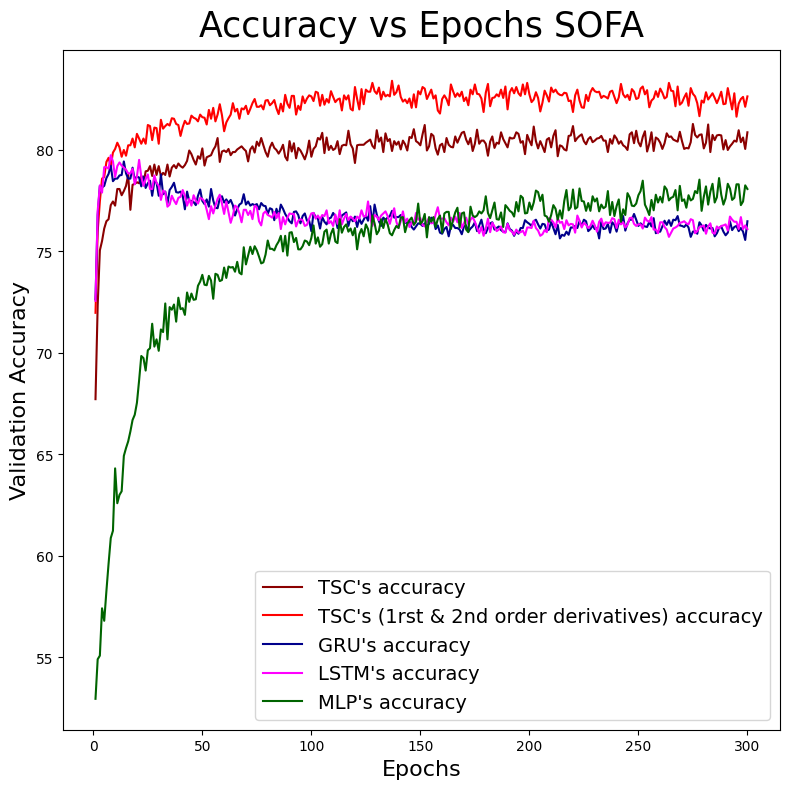

In [45]:
#Graphique des résultats:

fig=Window_Maker(
#Paramètres mathématiques
        mean_acc_test=mean_acc_test,
        IC_acc_test=IC_acc_test,
    #Epochs à afficher
        epochs=[0,n_epoch],
    #Liste des modèles:
        models=[
        "TSC's",
        "TSC's (1rst & 2nd order derivatives)",
        "GRU's",
        "LSTM's",
        "MLP's",
                ],
        
    #Intervals de confiances:    
    
        Conf_int=False,
#Paramètres du plot:
    #Taille de la figure:

        fig_size=(8,
                8),

        colors=colors,
    #Choix des légendes et titres:              
        title='Accuracy vs Epochs SOFA',
        legend_attach=" accuracy",
        x_label="Epochs",
        y_label='Validation Accuracy',
    #Taille des polices:    
        fontsize_title=25,     
        fontsize_ax=16,        
        fontsize_legend=14,

    #Gap Titre /Figure: 
        espace_entre_titre_et_graphe=10,
    )

In [44]:
# fig.savefig("C:/Users/Utilisateur/Documents/Master_SSD/STAGE_RECHERCHE/FDA_python/TSCNN/Comp_sofa_with_IC_300e.pdf",bbox_inches="tight")
fig.savefig("path+nom_de_la_figure.pdf",bbox_inches="tight")

In [40]:
grids = {
    "n_epochs": 25,
    "n_conv_in": (32,64, 128,256),
    "n_conv_in2": (32,64, 128,256),
    "n_conv_in3": (32,64, 128,256),
    "n_Flat_out": (32,64, 128,256),
    "stride_1": (1,2),
    "stride_2": (1,2),
    "stride_3": 1,
    "stride_pool_1": 1,
    "stride_pool_2": 1,
    "stride_pool_3": 1,
    "kernel_size_1": (4,5,6,7),
    "kernel_size_2": (2,3,4),
    "kernel_size_3": (2,3,4),
    "kernel_size_pool_1": np.arange(3)[2:],
    "kernel_size_pool_2": np.arange(3)[2:],
    "kernel_size_pool_3": (2,3),
    "dilation_1": np.arange(3)[1:],
    "dilation_2": np.arange(3)[1:],
    "dilation_3": np.arange(3)[1:],
    "dilation_pool_1": 1,
    "dilation_pool_2": 1,
    "dilation_pool_3": 1,
    "padding_1": np.arange(3)[1:],
    "padding_2": np.arange(3)[1:],
    "padding_3": np.arange(3)[1:],
    "padding_pool_1": np.arange(2)[1:],
    "padding_pool_2": np.arange(2)[1:],
    "padding_pool_3": np.arange(2)[1:],
    "opt": "Adam",
    "lr": (0.00089,0.0001,0.00007),
    "loss": nn.CrossEntropyLoss(),
    "activation": [nn.Tanh(),nn.Sigmoid()],
    "lr":(0.0001,0.0005,0.001,0.005,0.0089),
    "opt":["Adam","SGD","Adagrad","AdaDelta"]
}


In [41]:
parametres_a_tester=["opt","activation","lr"]

In [48]:
Hyperparameter_Search(
    model_class="LSTM_class",
    hyperparams=param_lstm,
    grids=grids,data_dict=data_dict3,
    supra_epochs=20,
    parameters=parametres_a_tester,
    )

TypeError: Hyperparameter_Search() got an unexpected keyword argument 'data_dict'

In [46]:

# #Modification des paramètres si nécessaire
# param_special[model_list[0]]["Phoneme"].derivative=[0,1]
# param_special[model_list[0]]["Phoneme"].n_conv_in3=128
# param_special[model_list[0]]["Phoneme"].kernel_size_1=7
# param_special[model_list[0]]["Phoneme"].opt='SGD'
# param_special[model_list[0]]["Phoneme"].lr=0.00089

# param_special[model_list[0]]["Phoneme"].DropOut=0.2


# param_special[model_list[0]]["El Nino"].kernel_size_1=11
# param_special[model_list[0]]["El Nino"].n_conv_in3=128
# param_special[model_list[0]]["El Nino"].derivative=[0,1]
# param_special[model_list[0]]["El Nino"].opt='Adam'
# param_special[model_list[0]]["El Nino"].activation=nn.Identity()
# param_special[model_list[0]]["Sofa"].derivative=[0,1]
# param_special[model_list[0]]["Sofa"].n_conv_in3=128
# param_special[model_list[0]]["Sofa"].DropOut=0.4
# param_special[model_list[0]]["Sofa"].order=3

# param_special[model_list[0]]["Canadian Weather"].opt="SGD"
# param_special[model_list[0]]["Canadian Weather"].lr=0.00089

# param_special[model_list[0]]["Canadian Weather"].derivative=[0,1]
# param_special[model_list[0]]["Tecator"].derivative=[0]
# param_special[model_list[0]]["Tecator"].kernel_size_1=7

# param_special[model_list[0]]["Tecator"].opt='SGD'
# param_special[model_list[0]]["Tecator"].lr=0.00089
# param_TSCNN_sofa=param_special[model_list[0]]["Sofa"]
# param_TSCNN_phoneme=param_special[model_list[0]]["Phoneme"]
# param_TSCNN_tecator=param_special[model_list[0]]["Tecator"]
# # param_TSCNN_tecator.opt='SGD'

# # param_TSCNN_tecator.lr=0.0089
# # param_TSCNN_tecator.order=3
# # param_TSCNN_tecator.n_knots=6
# # param_TSCNN_tecator.derivative=[0]

# # # param_TSCNN_tecator.kernel_size_1=7
# # param_TSCNN_tecator.granulation=2100
# # param_TSCNN_tecator.loss=nn.MSELoss()
# # param_TSCNN_tecator.DropOut=0.089

# # param_TSCNN_tecator.dilation_1=120
# # param_TSCNN_tecator.activation=nn.Identity()
# # # param_TSCNN_tecator.n_conv_in=259

# # param_TSCNN_tecator.stride_1=100
# # param_TSCNN_tecator.kernel_size_1
# # param_TSCNN_tecator.granulation